# connect to google drive

In [2]:
# Set up the dataset
# read the file and connect to google drive file
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# setting up data folders

In [3]:
import os
# extracted_path = '/content/extracted_data/'
path = "/content/drive/MyDrive/coffee_disease/"
# List all files in the directory
files = os.listdir(path)
# Print the list of files
print("Files in the directory:")
for file in files:
    print(file)

Files in the directory:
Healthy
Miner
Leaf_rust
Phoma
Cerscospora
Mobilenet.h5


# Check the number of files in each folder

In [4]:

# List all subdirectories-each subdirectory represents a class
class_folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

# Print the number of files in each folder
for class_folder in class_folders:
    class_path = os.path.join(path, class_folder)
    num_files = len(os.listdir(class_path))
    print(f"Number of files in {class_folder}: {num_files}")


Number of files in Healthy: 2799
Number of files in Miner: 1112
Number of files in Leaf_rust: 1551
Number of files in Phoma: 2325
Number of files in Cerscospora: 5503


# Set up data to training, testing and validation
We are going to use split folder function to organize oue data ito three categories: training, testing and validation in he ratio of 80:10:10. The new dataset will be saved in the output folder

In [5]:
!pip install split-folders

In [6]:
#option 1
import splitfolders
splitfolders.ratio(path, output="output", seed=1337, ratio=(.7, 0.1,0.2))

Copying files: 13290 files [04:29, 49.38 files/s] 


# Set the paths for training, testing and validation

In [7]:
train_path="//content/output/train"
test_path="/content/output/test"
valid_path="/content/output/val"

# Unzipping data incase you have zipped data

> Indented block



In [ ]:
# # Unziping data and setting up training and testing folders
# import zipfile
# import os
# from sklearn.model_selection import train_test_split
# import shutil
# # Unzip the file in Colab
# for file in files:
#   try:
#     condition="/content/drive/MyDrive/coffee_disease/"+file
#     print(f"unzipping {condition} folder")
#     with zipfile.ZipFile(condition, 'r') as zip_ref:
#         zip_ref.extractall(path)
#   except:
#     pass

# Exploratory data analysis

## Check the number of files in training,validation and testing data

In [ ]:
# def count_files(path_to_folder):
#   print(path_to_folder)
#   # List all subdirectories-each subdirectory represents a class
#   class_folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(train_path, folder))]
#   # Print the number of files in each folder
#   for class_folder in class_folders:
#       # print(class_folder)
#       class_path = os.path.join(path, class_folder)
#       num_files = len(os.listdir(class_path))
#       return (f"Number of files in {class_folder}: {num_files}")
# training=count_files(train_path)
# validation=count_files(valid_path)
# testing=count_files(test_path)
# training

# Image visualization from each folder

Cerscospora


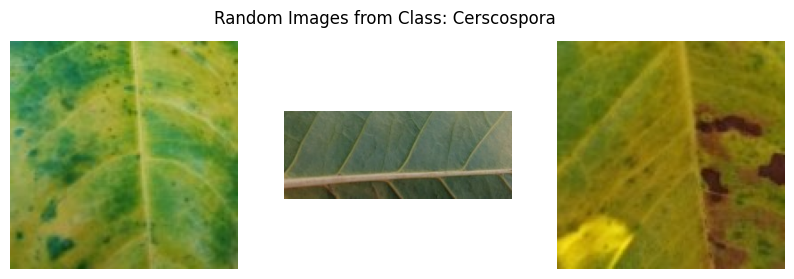

Healthy


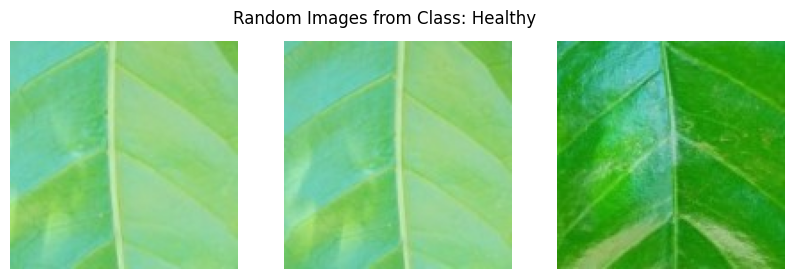

Leaf_rust


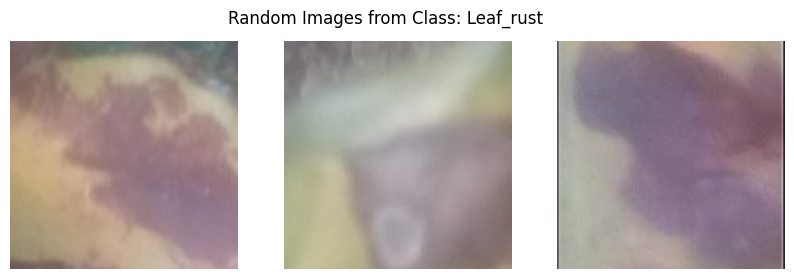

Miner


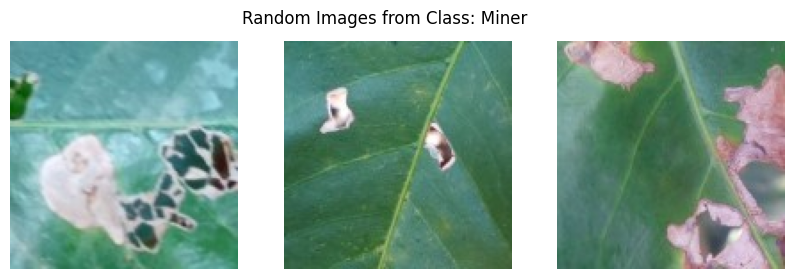

Phoma


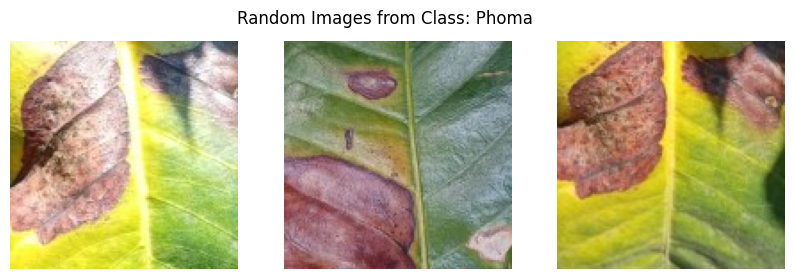

In [8]:
# Visualize data images
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import random

# Function to display images
def show_images(image_paths, folder_name):
    plt.figure(figsize=(10, 3))
    plt.suptitle(f"Random Images from {folder_name}")

    for i, image_path in enumerate(image_paths, 1):
        image = plt.imread(image_path)
        plt.subplot(1, 3, i)
        plt.imshow(image)
        plt.axis("off")

    plt.show()


# # List all subdirectories (assuming each subdirectory represents a class)
# class_folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

# Display three random images from each class
files_new=['Cerscospora','Healthy','Leaf_rust','Miner','Phoma']
for class_folder in files_new:
    print(class_folder)
    class_path = os.path.join(path, class_folder)
    class_images = random.sample(os.listdir(class_path), 3)
    class_image_paths = [os.path.join(class_path, image) for image in class_images]

    # Display random images from the current class
    show_images(class_image_paths, f'Class: {class_folder}')


# Building MobileNet model

# import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
import itertools
from sklearn.metrics import confusion_matrix

In [ ]:
print(tf.__version__)

2.14.0


# set seed for reproducibility

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(142)


# Model Building
## Create instance of Imgaedatagenerator for processing of the images

# Mobile Net pretraining

## Importing required libraries

In [10]:
import keras
from keras import backend as K
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

## import the mobilenet model and discards the last 1000 neuron layer.

W are going to re-use MobileNet as it is quite lightweight (17Mb), by freezing the base layers and  and train the top few layers

In [32]:
base_model=MobileNet(weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
#we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x)
#dense layer 2
x=Dense(1024,activation='relu')(x)
 #dense layer 3
x=Dense(512,activation='relu')(x)
 #final layer with softmax activation
preds=Dense(5,activation='softmax')(x)

##

In [33]:
model=Model(inputs=base_model.input,outputs=preds)

# Checking the model architecture


In [34]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [35]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:-33]:
    layer.trainable=True
# for layer in model.layers[20:]:
#     layer.trainable=True

In [52]:
classes=['Cerscospora','Healthy','Leaf_rust','Miner','Phoma']

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory(train_path,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                  # classes=classes,
                                                 class_mode='categorical',
                                                 shuffle=True)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

val_generator=val_datagen.flow_from_directory(valid_path,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                  # classes=classes,
                                                 class_mode='categorical',
                                                 shuffle=True)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=test_datagen.flow_from_directory(test_path,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                  # classes=classes,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 10630 images belonging to 5 classes.
Found 1327 images belonging to 5 classes.
Found 1333 images belonging to 5 classes.


In [42]:
# check data distribution in different classes

# List all subdirectories-each subdirectory represents a class
class_folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

# Print the number of files in each folder
for class_folder in class_folders:
    class_path = os.path.join(path, class_folder)
    num_files = len(os.listdir(class_path))
    print(f"Number of files in {class_folder}: {num_files}")


Number of files in Healthy: 2799
Number of files in Miner: 1112
Number of files in Cerscospora: 5503
Number of files in Phoma: 2325
Number of files in Leaf_rust: 1551


In [40]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_val = val_generator.n // val_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=step_size_train,
                    epochs=5,
                    validation_data=val_generator,
                    validation_steps=step_size_val)

<ipython-input-41-46f8656fb8a2>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


Epoch 1/5
83/83 [==============================] - 2004s 24s/step - loss: 0.0055 - accuracy: 0.9993 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 2/5
83/83 [==============================] - 2083s 25s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/5
83/83 [==============================] - 1947s 23s/step - loss: 5.7887e-04 - accuracy: 1.0000 - val_loss: 9.9847e-04 - val_accuracy: 1.0000
Epoch 4/5
83/83 [==============================] - 2030s 24s/step - loss: 3.5997e-04 - accuracy: 1.0000 - val_loss: 3.2037e-04 - val_accuracy: 1.0000
Epoch 5/5
83/83 [==============================] - 1948s 24s/step - loss: 0.0117 - accuracy: 0.9980 - val_loss: 0.1109 - val_accuracy: 0.9703


# save the model

In [43]:
# Save the trained model to a file
model.save(f"{path}/Mobilenet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# We will now check the predictions

In [44]:
# load the model
from tensorflow.keras.models import load_model
savedModel=load_model(f'{path}/Mobilenet.h5')
savedModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 32)    128 

In [45]:
# loading test image
def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor

In [92]:
import os
import numpy as np
import matplotlib.pyplot as plt

def make_prediction(image_path_input):
    try:
        new_image = load_image(image_path_input)
        if new_image.dtype != np.float32:
            new_image = new_image.astype(np.float32)
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

    pred_probs = model.predict(new_image)

    # Get the predicted class index with the highest probability
    predicted_class_index = np.argmax(pred_probs)
    classes=['Cerscospora','Healthy','Leaf_rust','Miner','Phoma']

    # Get the corresponding class label
    predicted_class = classes[predicted_class_index]

    # Extract the ground truth class from the image path
    true_class = os.path.basename(os.path.dirname(image_path_input))

    # Check if the prediction is correct
    is_correct = predicted_class == true_class

    # Get the probability of the predicted class
    predicted_probability = pred_probs[0, predicted_class_index]

  # Plot the image
    image = plt.imread(image_path_input)
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis("off")

    # Set text color based on correctness
    text_color = 'green' if is_correct else 'red'

    # Display the predicted class and probability
    plt.title(f"Predicted: {predicted_class} ({predicted_probability:.2f})", color=text_color)

    # Return the predicted class, probability, and correctness
    return predicted_class, predicted_probability, true_class,is_correct


1/1 [==============================] - 0s 44ms/step


('Leaf_rust', 0.9954717, 'Leaf_rust')

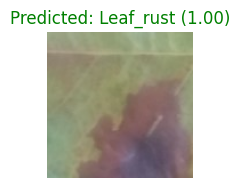

In [90]:
make_prediction("/content/output/test/Leaf_rust/5 (3453).jpg")

1/1 [==============================] - 0s 60ms/step


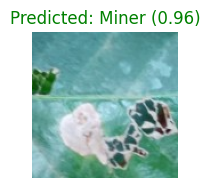

True class: Miner
Predicted Class: Miner
Probability: 0.9565468430519104
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 57ms/step


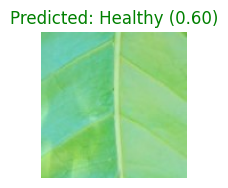

True class: Healthy
Predicted Class: Healthy
Probability: 0.5966426134109497
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 58ms/step


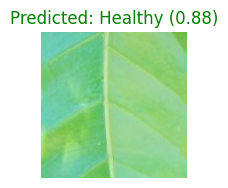

True class: Healthy
Predicted Class: Healthy
Probability: 0.8768966197967529
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 70ms/step


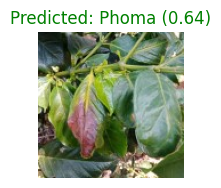

True class: Phoma
Predicted Class: Phoma
Probability: 0.6397106647491455
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 57ms/step


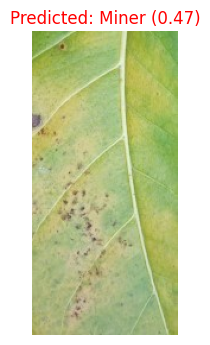

True class: Cerscospora
Predicted Class: Miner
Probability: 0.47370725870132446
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 55ms/step


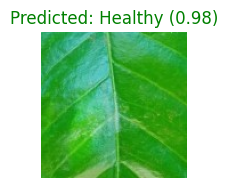

True class: Healthy
Predicted Class: Healthy
Probability: 0.9819435477256775
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 56ms/step


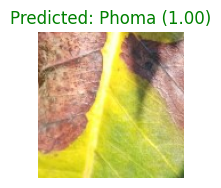

True class: Phoma
Predicted Class: Phoma
Probability: 0.9981544613838196
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 60ms/step


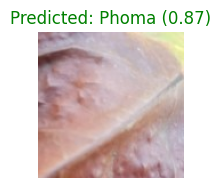

True class: Phoma
Predicted Class: Phoma
Probability: 0.8670263290405273
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 61ms/step


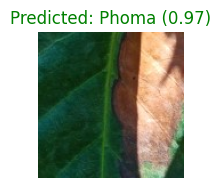

True class: Phoma
Predicted Class: Phoma
Probability: 0.9704472422599792
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 59ms/step


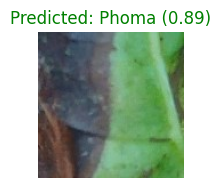

True class: Phoma
Predicted Class: Phoma
Probability: 0.8908759355545044
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 63ms/step


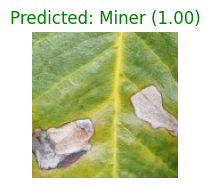

True class: Miner
Predicted Class: Miner
Probability: 0.9962816834449768
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 54ms/step


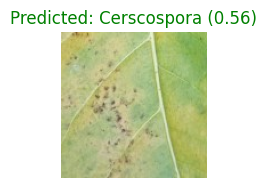

True class: Cerscospora
Predicted Class: Cerscospora
Probability: 0.5630387663841248
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 57ms/step


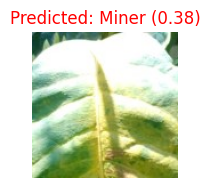

True class: Cerscospora
Predicted Class: Miner
Probability: 0.3826218843460083
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 54ms/step


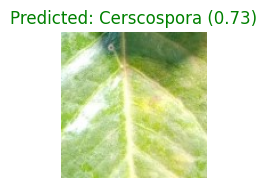

True class: Cerscospora
Predicted Class: Cerscospora
Probability: 0.7265831828117371
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 55ms/step


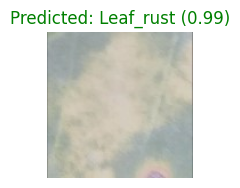

True class: Leaf_rust
Predicted Class: Leaf_rust
Probability: 0.9948467016220093
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 56ms/step


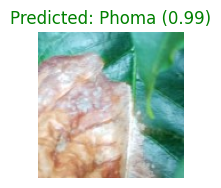

True class: Phoma
Predicted Class: Phoma
Probability: 0.9936649799346924
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 74ms/step


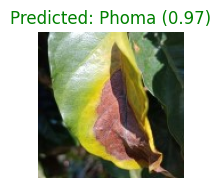

True class: Phoma
Predicted Class: Phoma
Probability: 0.9686225056648254
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 46ms/step


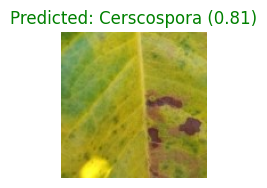

True class: Cerscospora
Predicted Class: Cerscospora
Probability: 0.8126081228256226
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 42ms/step


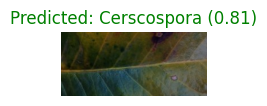

True class: Cerscospora
Predicted Class: Cerscospora
Probability: 0.8106690049171448
######################################################################################################################################################
######################################################################################################################################################
1/1 [==============================] - 0s 39ms/step


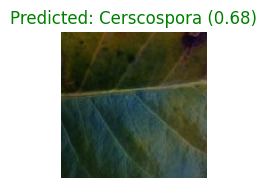

True class: Cerscospora
Predicted Class: Cerscospora
Probability: 0.6846131086349487
######################################################################################################################################################
######################################################################################################################################################


In [95]:
# Testing for prediction

import os
import random
import matplotlib.pyplot as plt

# Get a list of all image files in the test directory
all_images = []
for root, dirs, files in os.walk(test_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_images.append(os.path.join(root, file))

# Randomly select 20 images from the list
random_images = random.sample(all_images, 20)

# Predict and display each randomly selected image
for image_path in random_images:
    predicted_class, predicted_probability, true_class,is_corrrect = make_prediction(image_path)
    plt.show()
    print(f"True class: {true_class}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Probability: {predicted_probability}")
    # print(f"Correct Prediction: {is_correct}")
    print("="*50)
    print("######################################################################################################################################################")
    print("######################################################################################################################################################")

In [47]:
img_path_healthy='/content/output/test/Healthy/2 (2594).jpg'
img_path_healthy_train='/content/output/train/Healthy/2 (260).jpg'
img_path_leaf_rust='/content/output/test/Leaf_rust/5 (3453).jpg'

img_path_leaf_rust_train='/content/output/train/Leaf_rust/5 (3440).jpg'

img_path_minor='/content/output/test/Miner/1 (8912).jpg'
img_path_minor_train='/content/output/train/Miner/1 (8874).jpg'

# new_image = load_image(img_path_healthy)
# new_image_healthy_train = load_image(img_path_healthy_train)

# new_image1 = load_image(img_path_leaf_rust)
# new_image1_rust_train = load_image(img_path_leaf_rust_train)

# new_image2 = load_image(img_path_minor)
# new_image2_minor_train = load_image(img_path_minor_train)

# pred_healthy = model.predict(new_image)
# pred_healthy
# pred_rust = model.predict(new_image1)
# pred_rust
# pred_minor = model.predict(new_image2)

# pred_minor

In [ ]:
# make prediction

In [48]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Assuming you have a test generator
step_size_test = test_generator.n // test_generator.batch_size

# Evaluate the model on the test set
test_generator.reset()  # Reset the generator to the beginning
y_true = []
y_pred_probs = []

for _ in range(step_size_test):
    x_test, y_test = test_generator.next()
    y_true.extend(np.argmax(y_test, axis=1))  # Convert one-hot encoding to class labels
    y_pred_probs.extend(np.argmax(model.predict(x_test), axis=1))

# Check if there are additional samples in the last batch
remaining_samples = test_generator.n % test_generator.batch_size
if remaining_samples > 0:
    last_batch = test_generator.next()
    x_test_last, y_test_last = last_batch
    y_true.extend(np.argmax(y_test_last[:remaining_samples], axis=1))
    y_pred_probs.extend(np.argmax(model.predict(x_test_last[:remaining_samples]), axis=1))


2/2 [==============================] - 2s 640ms/step


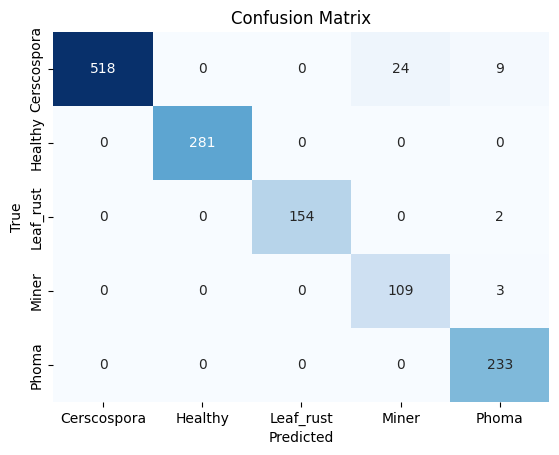

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_probs)

# Plot the confusion matrix with class names
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# # Plot the ROC curve
# fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
# plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

In [55]:
# Calculate AUC
auc_score = roc_auc_score(np.eye(len(classes))[y_true], np.eye(len(classes))[y_pred_probs], multi_class='ovr')
auc_score

0.9868119373432439